<a href="https://colab.research.google.com/github/dilaraozcerit/Machine-Learning/blob/main/assignment_2_solution_Ares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart-stroke prediction

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type(göğüs agrısı) | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest (Dinlenmeye göre egzersizin neden olduğu ST depresyonu)
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping (maxium egzersizde ST segmentinin eğimi)
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Exploratory Data Analysis and Visualization

In [78]:
df = pd.read_csv('heart.csv')

In [79]:
df.head() 
# cp(göğüs agrısı tipi) ,restecg(dinlenme kardiografi sonuçları) ,slope(maxium egzersizde ST segmentinin eğilimi) , thal

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [81]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [82]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

In [83]:
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

In [84]:
df['slope']=df['slope'].replace({1:'upsloping',2:'flat',3:'downsloping'})

In [85]:
df['thal']=df['thal'].replace({3:'normal',6:'fixed defect',7:'reversable defect'})

In [86]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.3,0,0,1,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.5,0,0,2,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.4,flat,0,2,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.8,flat,0,2,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.6,flat,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,typical angina,140,241,0,having ST-T wave abnormality,123,1,0.2,upsloping,0,normal,0
299,45,1,asymptomatic,110,264,0,having ST-T wave abnormality,132,0,1.2,upsloping,0,normal,0
300,68,1,typical angina,144,193,1,having ST-T wave abnormality,141,0,3.4,upsloping,2,normal,0
301,57,1,typical angina,130,131,0,having ST-T wave abnormality,115,1,1.2,upsloping,1,normal,0


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


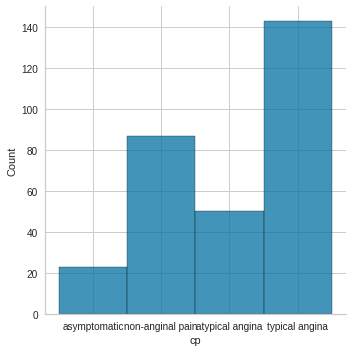

In [88]:
sns.displot(df.cp)

In [89]:
df.shape

(303, 14)

In [90]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

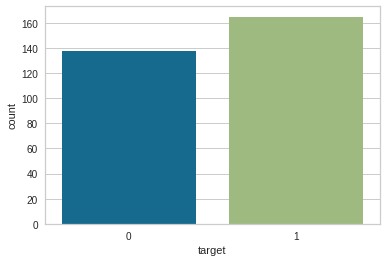

In [91]:
sns.countplot(df.target);

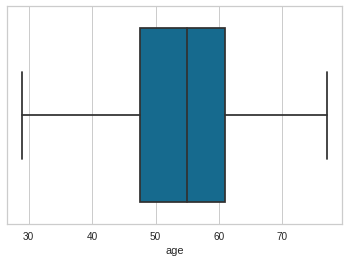

In [92]:
sns.boxplot(df.age);

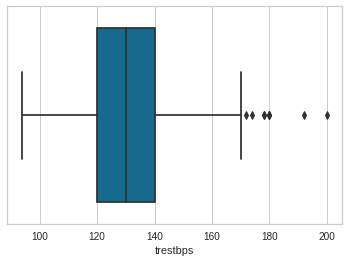

In [93]:
sns.boxplot(df.trestbps); # dinlenme kan basıncı

In [94]:
#df=df[df.trestbps<170]

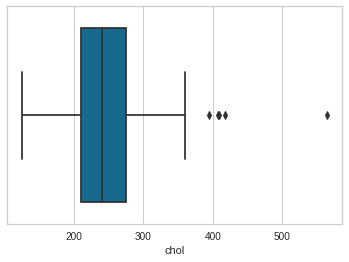

In [95]:
sns.boxplot(df.chol);

In [96]:
#df=df[df.chol<370]

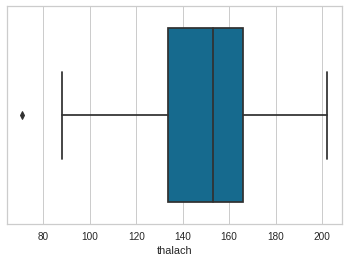

In [97]:
sns.boxplot(df.thalach);  # max kalp atışı

In [98]:
#df=df[df.thalach>80]  

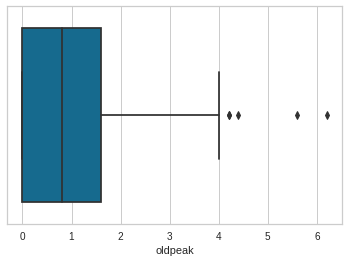

In [99]:
sns.boxplot(df.oldpeak);  # egzersize bağlı st depresyonu

In [100]:
#df=df[df.oldpeak<4]

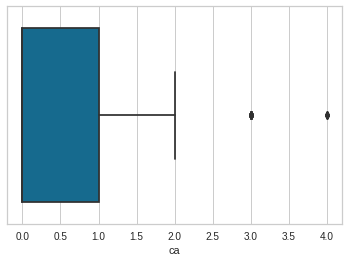

In [101]:
sns.boxplot(df.ca);  # büyük kan damar sayısı

In [102]:
#df=df[df.ca<2.5]

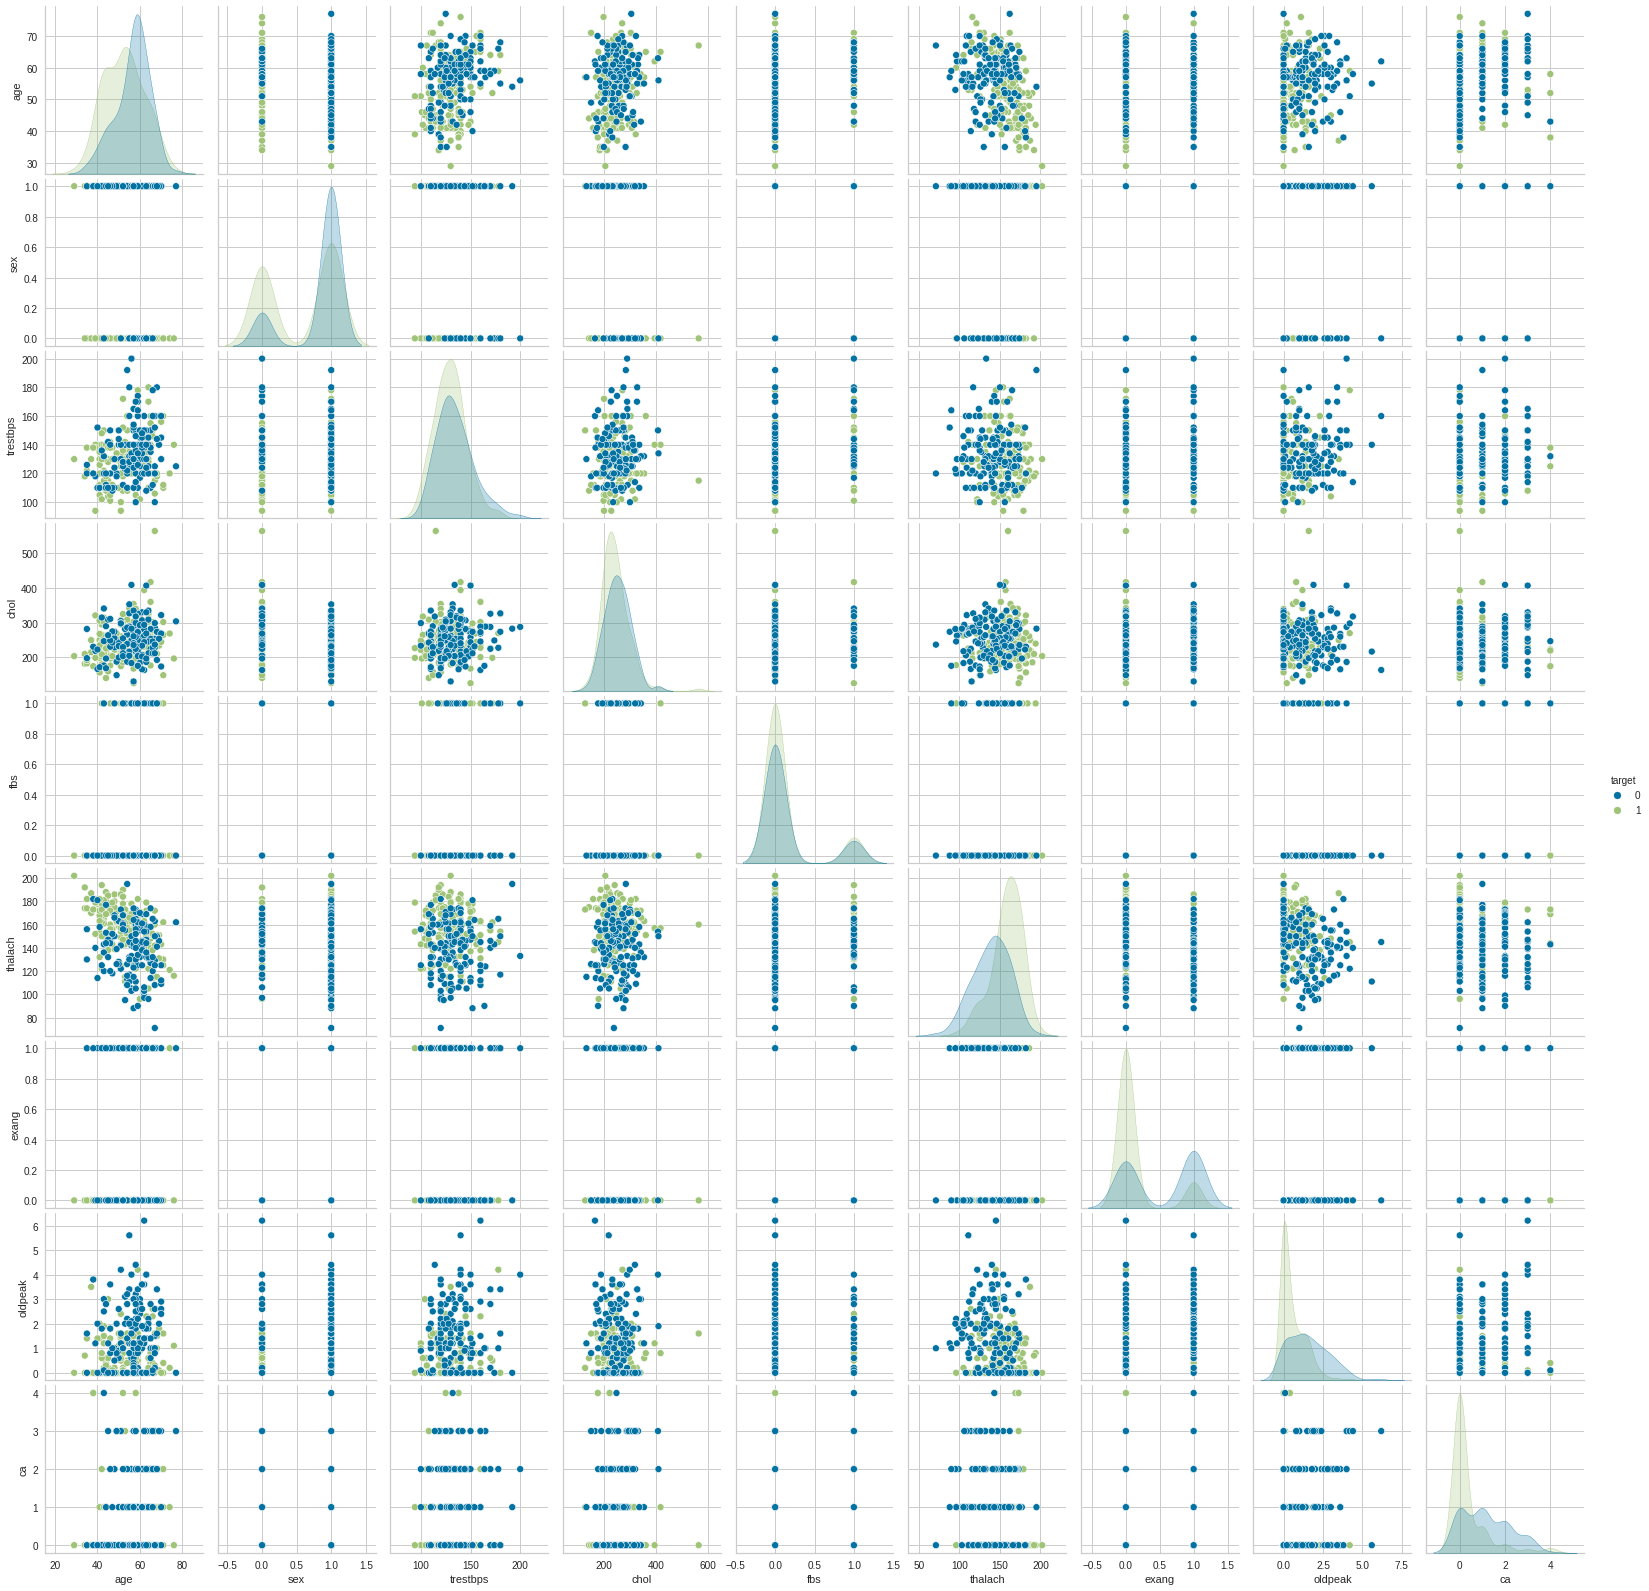

In [103]:
sns.pairplot(df.select_dtypes(include='number'), hue = "target")  # Green:1 Blue:0

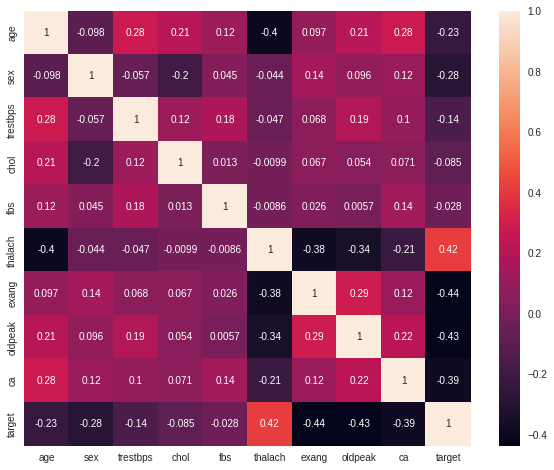

In [104]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

## Train | Test Split and Scaling

In [105]:
df=pd.get_dummies(df,drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,1,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,0,0,1,0,0,0,1,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,0,0,0,0,0,0,1,0,0,1
300,68,1,144,193,1,141,0,3.4,2,0,0,0,1,0,0,0,1,0,0,1
301,57,1,130,131,0,115,1,1.2,1,0,0,0,1,0,0,0,1,0,0,1


In [106]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=5)

In [108]:
scaler =MinMaxScaler()

In [109]:
X_train_scaled = scaler.fit_transform(X_train)

In [110]:
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [111]:
log_model = LogisticRegression()

In [112]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [113]:
y_pred=log_model.predict(X_test_scaled)

In [114]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

## Model Performance

In [115]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [116]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Train_Set
[[ 79  18]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.85      0.87      0.86       115

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



### Cross Validate

In [117]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.018799,0.007253,0.750000,0.750000,0.750000,0.727273
2,0.009026,0.004129,0.714286,0.833333,0.769231,0.727273
3,0.010973,0.004615,0.800000,0.727273,0.761905,0.761905
4,0.008972,0.004056,0.833333,0.909091,0.869565,0.857143
5,0.009023,0.004640,0.888889,0.727273,0.800000,0.809524
6,0.010441,0.004332,0.818182,0.818182,0.818182,0.809524
7,0.010152,0.004111,0.900000,0.818182,0.857143,0.857143
8,0.010784,0.004053,0.846154,0.916667,0.880000,0.857143
9,0.010336,0.004040,0.923077,1.000000,0.960000,0.952381
10,0.008270,0.004540,0.857143,1.000000,0.923077,0.904762


In [118]:
df_scores.mean()[2:]     #  accuracy:0.81   

test_precision    0.833106
test_recall       0.850000
test_f1           0.838910
test_accuracy     0.826407
dtype: float64

In [119]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Train_Set
[[ 79  18]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.85      0.87      0.86       115

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



### GridSearchCV

In [120]:
C = np.logspace(-1, 5, 20)
C

array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05])

In [121]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : [C,1],
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

In [122]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                               1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [123]:
grid_model.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [124]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)  # 0.81------->0.82

Test_Set
[[33  8]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91


Train_Set
[[82 15]
 [17 98]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        97
           1       0.87      0.85      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [125]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

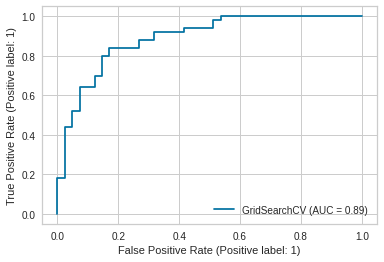

In [126]:
plot_roc_curve(grid_model, X_test_scaled, y_test)

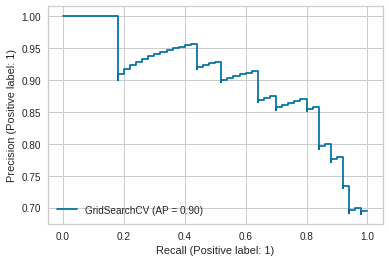

In [127]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

####  log_model final  Accuracy Score:0.82 ------------->16 hatalı tahmin

## KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn = KNeighborsClassifier()

In [130]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [131]:
knn_pred = knn.predict(X_test_scaled)

In [132]:
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[33  8]
 [11 39]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.83      0.78      0.80        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91


Train_Set
[[ 85  12]
 [ 13 102]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        97
           1       0.89      0.89      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



### Elbow Method for Choosing Reasonable K Values

In [133]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [134]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

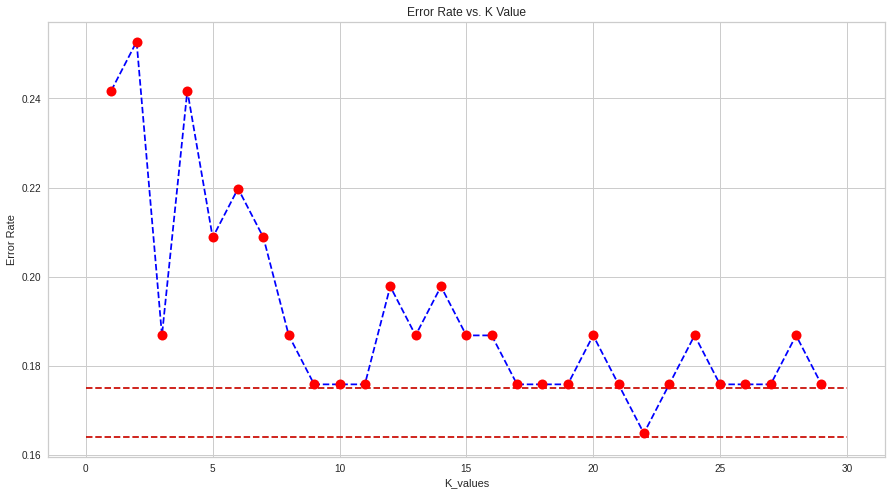

In [135]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.164, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.175, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

### Scores by Various K Values

In [136]:
knn = KNeighborsClassifier(n_neighbors=9)  # accuracy:0.82 -------> 16 hatalı tahmin

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)  

WITH K=9

Test_Set
[[33  8]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91


Train_Set
[[ 82  15]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        97
           1       0.87      0.87      0.87       115

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



In [137]:
knn = KNeighborsClassifier(n_neighbors=22)   # accuracy:0.84 -------> 15 hatalı tahmin

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set
[[32  9]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91


Train_Set
[[83 14]
 [18 97]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        97
           1       0.87      0.84      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



### Cross Validate

In [138]:
model =KNeighborsClassifier()  

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.003500,0.013828,0.750000,0.750000,0.750000,0.727273
2,0.001160,0.010373,0.769231,0.833333,0.800000,0.772727
3,0.001177,0.017460,0.875000,0.636364,0.736842,0.761905
4,0.001345,0.011111,0.909091,0.909091,0.909091,0.904762
5,0.001714,0.015010,0.909091,0.909091,0.909091,0.904762
6,0.002069,0.008083,0.900000,0.818182,0.857143,0.857143
7,0.001314,0.005635,0.900000,0.818182,0.857143,0.857143
8,0.000729,0.005322,0.846154,0.916667,0.880000,0.857143
9,0.000825,0.005567,0.785714,0.916667,0.846154,0.809524
10,0.000841,0.006398,0.846154,0.916667,0.880000,0.857143


In [139]:
df_scores.mean()[2:]        # accuracy:0.82

test_precision    0.849043
test_recall       0.842424
test_f1           0.842546
test_accuracy     0.830952
dtype: float64

In [140]:
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[32  9]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91


Train_Set
[[83 14]
 [18 97]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        97
           1       0.87      0.84      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



### Gridsearch Method for Choosing Reasonable K Values

In [141]:
knn_grid = KNeighborsClassifier()

In [142]:
k_values= range(1,30)

In [143]:
param_grid = {"n_neighbors":k_values}

In [144]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [145]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy')

In [146]:
knn_grid_model.best_params_

{'n_neighbors': 18}

In [147]:
print('WITH K=18\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=18

Test_Set
[[31 10]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91


Train_Set
[[83 14]
 [18 97]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        97
           1       0.87      0.84      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



### Evaluating ROC Curves and AUC

In [148]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [149]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

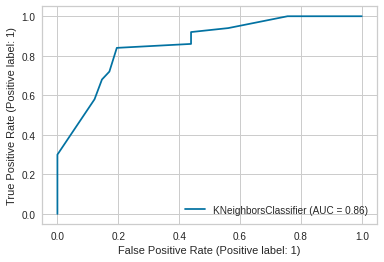

In [150]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [151]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8590243902439024

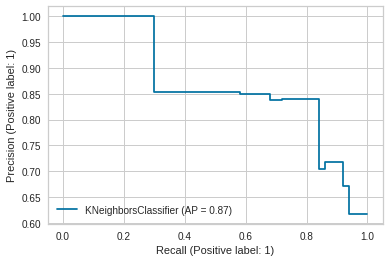

In [152]:
plot_precision_recall_curve(knn_model, X_test_scaled, y_test);

#### knn final Accuracy Score:0.82-------> 16 hatalı tahmin